In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('MobileTrain.csv')
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [5]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [7]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# EDA

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

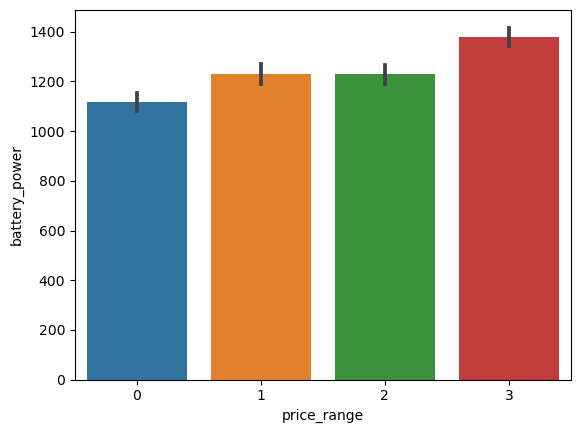

In [9]:
plt.figure()
sns.barplot(y="battery_power", x="price_range", data=train)

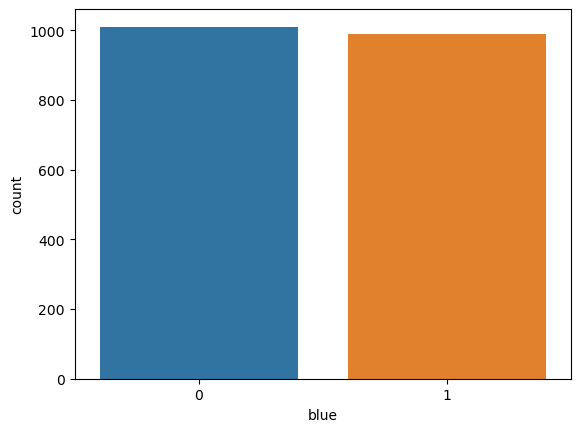

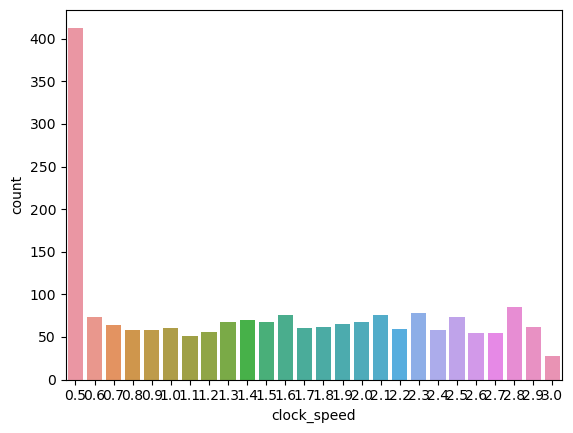

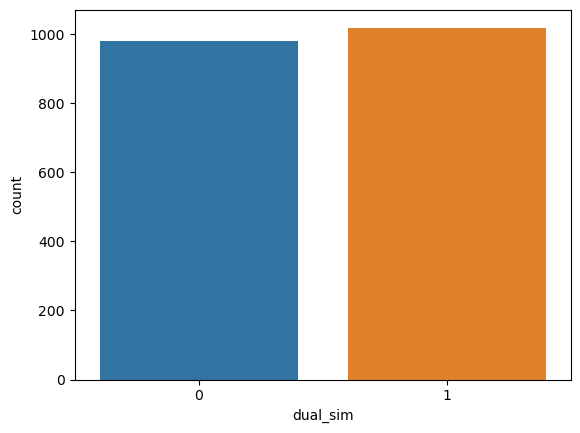

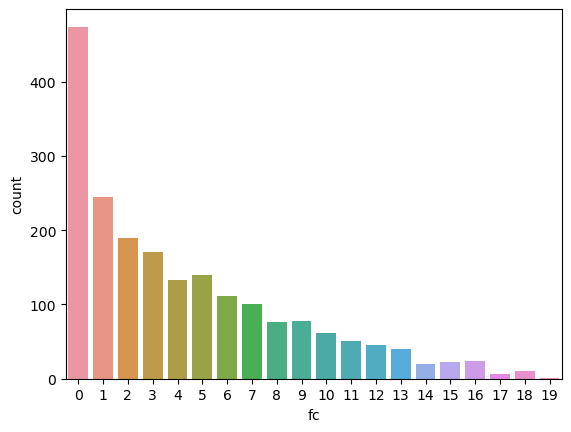

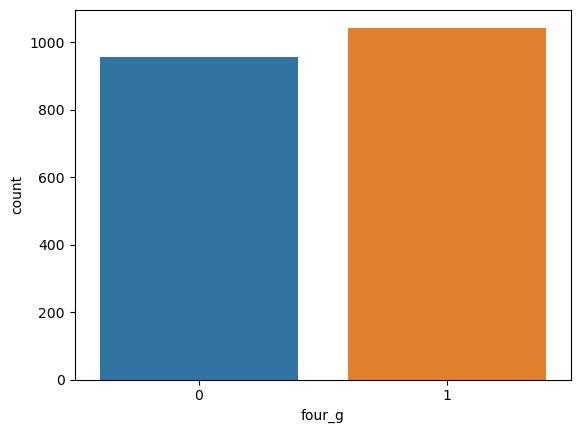

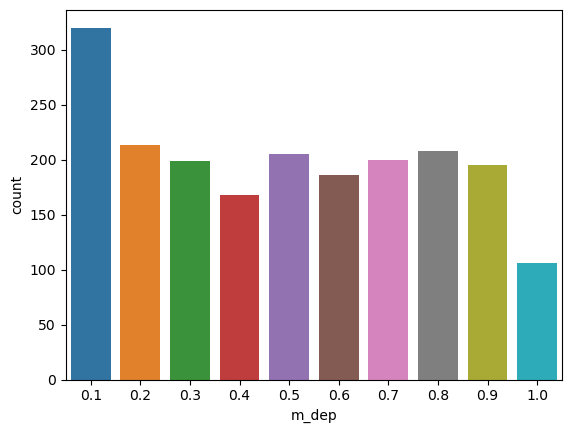

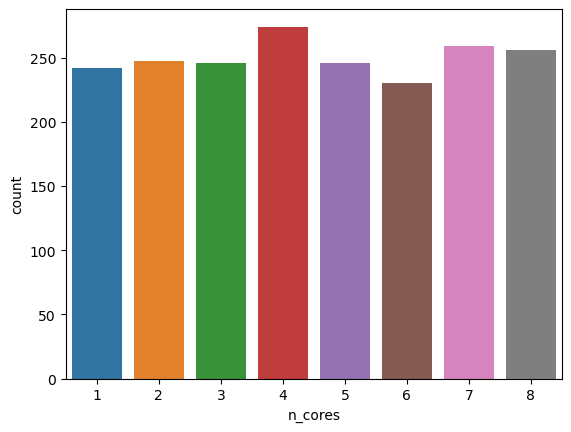

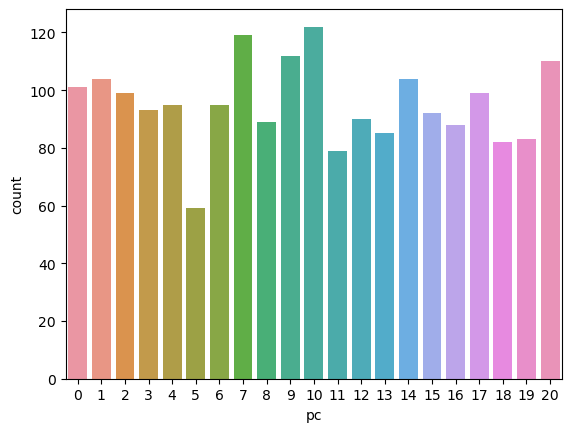

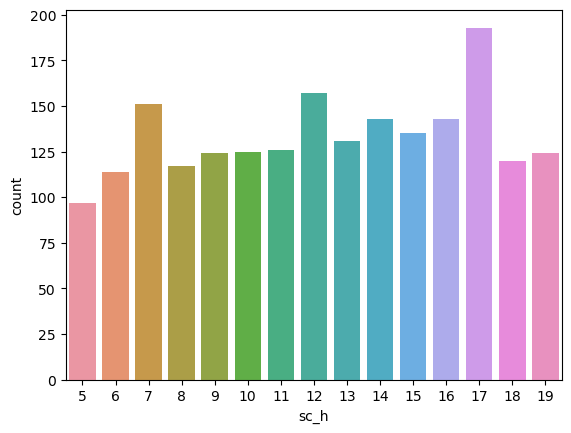

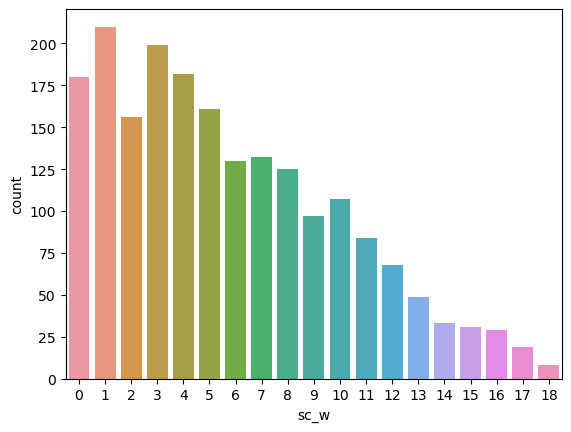

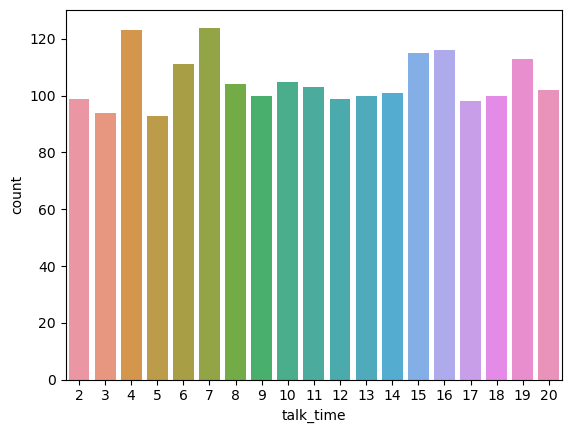

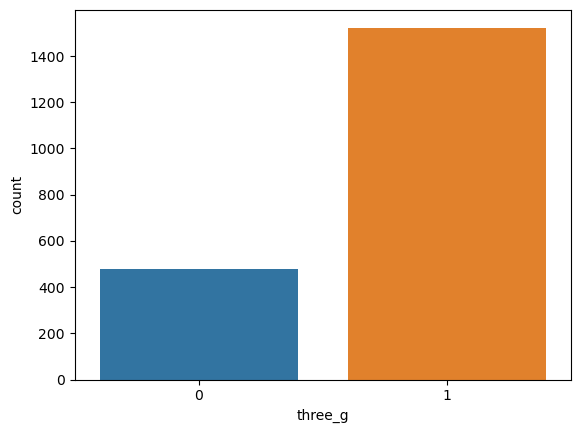

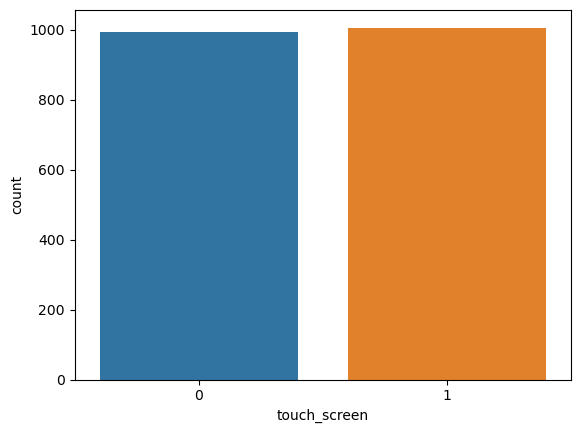

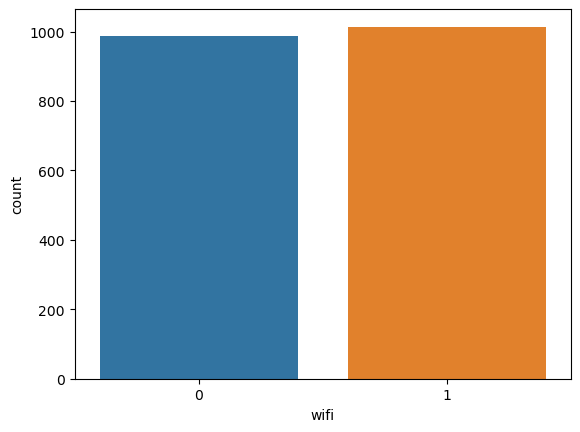

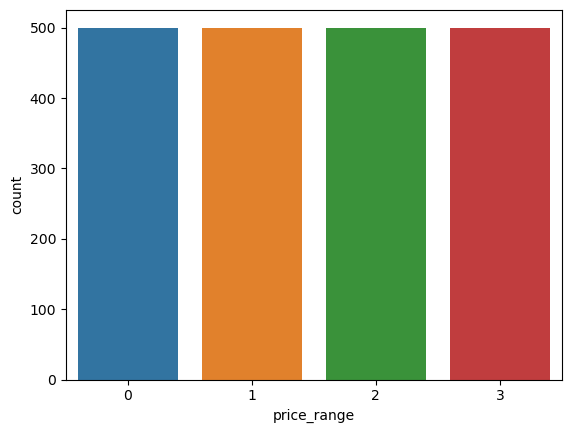

In [10]:
for i in train:
    if (train[i].nunique())<=30:
        sns.countplot(x=train[i])
        plt.show()

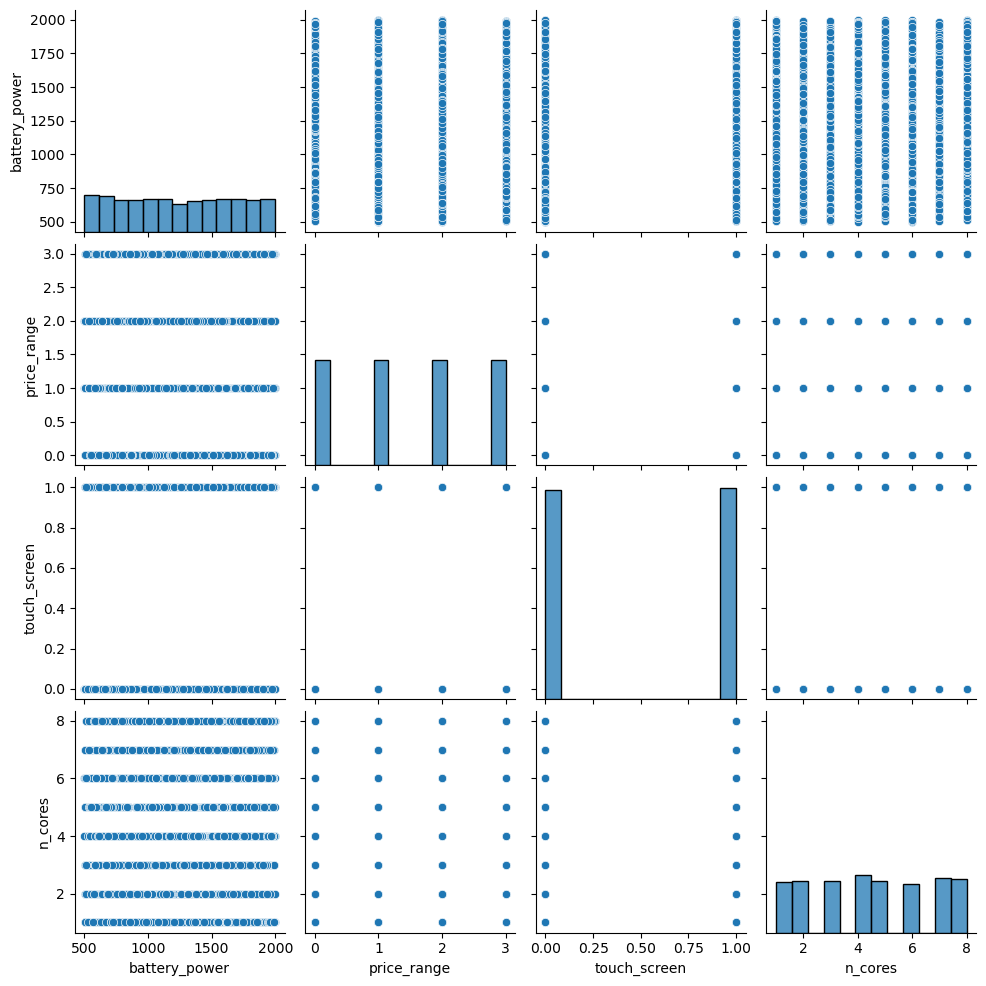

In [11]:
slicedata=train[['battery_power','price_range','touch_screen','n_cores']]
sns.pairplot(slicedata)

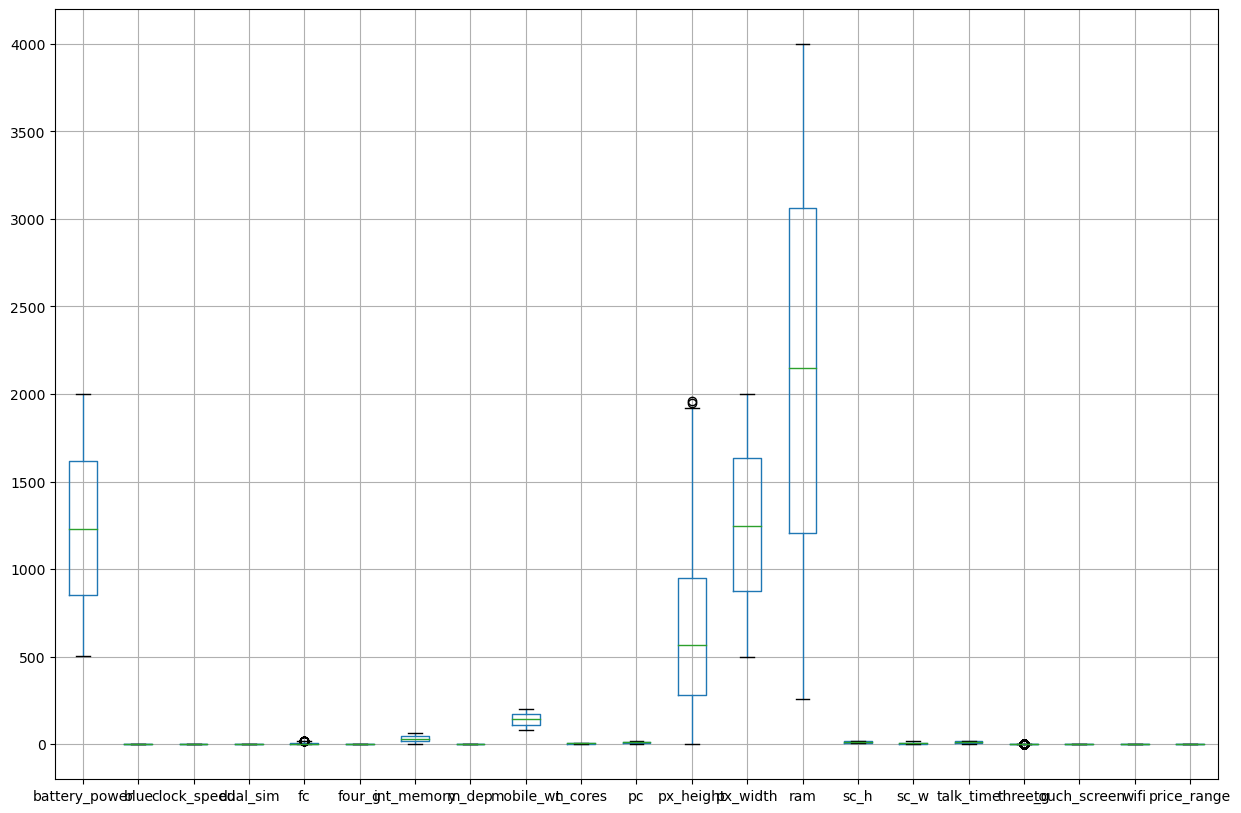

In [12]:
train.boxplot(figsize=(15,10))
plt.show()

<AxesSubplot:xlabel='talk_time', ylabel='count'>

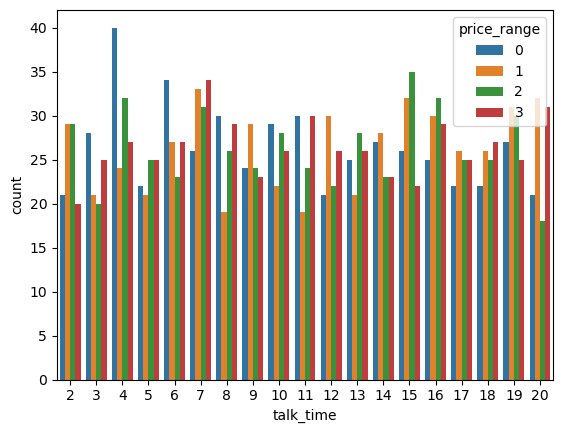

In [13]:
sns.countplot(x ='talk_time', hue='price_range', data=train)

<AxesSubplot:xlabel='price_range', ylabel='count'>

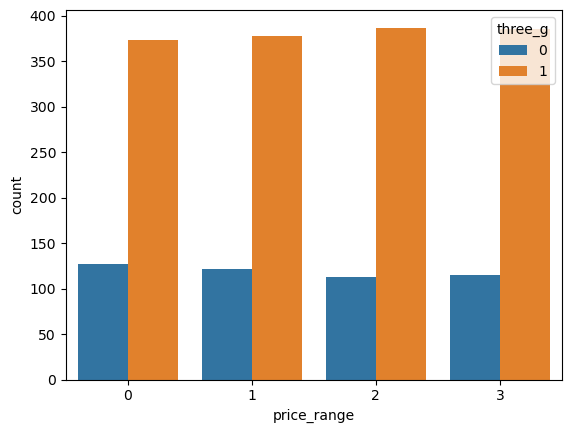

In [14]:
sns.countplot(x ='price_range', hue='three_g', data=train)

<AxesSubplot:xlabel='price_range', ylabel='count'>

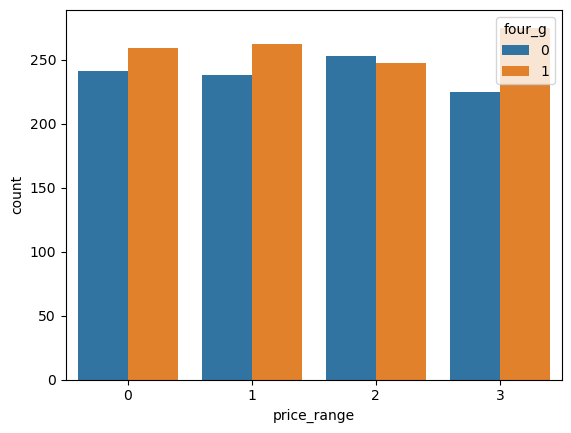

In [15]:
sns.countplot(x ='price_range', hue='four_g', data=train)

# Classify dataset into two

In [16]:
data1 = train.loc[:,['battery_power','blue','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','price_range']]
data1

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,price_range
0,842,0,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,1
1,1021,1,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,2
2,563,1,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,2
3,615,1,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,2
4,1821,1,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,0
1996,1965,1,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,2
1997,1911,0,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,3
1998,1512,0,0,4,1,46,0.1,145,5,5,336,670,869,18,10,0


In [17]:
data2 = train.loc[:,['talk_time','three_g','wifi','touch_screen','clock_speed']]
data2

,talk_time,three_g,wifi,touch_screen,clock_speed
0,19,0,1,0,2.2
1,7,1,0,1,0.5
2,9,1,0,1,0.5
3,11,1,0,0,2.5
4,15,1,0,1,1.2
...,...,...,...,...,...
1995,19,1,0,1,0.5
1996,16,1,1,1,2.6
1997,5,1,0,1,0.9
1998,19,1,1,1,0.9


# Merging dataset

In [18]:
train = pd.concat([data1, data2], axis=1)
train

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,px_width,ram,sc_h,sc_w,price_range,talk_time,three_g,wifi,touch_screen,clock_speed
0,842,0,0,1,0,7,0.6,188,2,2,...,756,2549,9,7,1,19,0,1,0,2.2
1,1021,1,1,0,1,53,0.7,136,3,6,...,1988,2631,17,3,2,7,1,0,1,0.5
2,563,1,1,2,1,41,0.9,145,5,6,...,1716,2603,11,2,2,9,1,0,1,0.5
3,615,1,0,0,0,10,0.8,131,6,9,...,1786,2769,16,8,2,11,1,0,0,2.5
4,1821,1,0,13,1,44,0.6,141,2,14,...,1212,1411,8,2,1,15,1,0,1,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,1,2,0.8,106,6,14,...,1890,668,13,4,0,19,1,0,1,0.5
1996,1965,1,1,0,0,39,0.2,187,4,3,...,1965,2032,11,10,2,16,1,1,1,2.6
1997,1911,0,1,1,1,36,0.7,108,8,3,...,1632,3057,9,1,3,5,1,0,1,0.9
1998,1512,0,0,4,1,46,0.1,145,5,5,...,670,869,18,10,0,19,1,1,1,0.9


# Classification

In [19]:
x=train.drop(['price_range'],axis=1)
y=pd.DataFrame(train['price_range'])

In [20]:
test = pd.read_csv('MobileTest.csv')
test 

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)

In [23]:
x_test = test

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [25]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions= logmodel.predict(x_val)
print('Accuracy is: ',accuracy_score(y_val,predictions))
confusion_matrix(y_val,predictions)

Accuracy is:  0.6333333333333333


array([[114,  36,   1,   0],
       [ 27,  74,  36,   9],
       [  1,  30,  78,  39],
       [  0,   3,  38, 114]], dtype=int64)

In [26]:
from sklearn.tree  import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()
dtmodel.fit(x_train,y_train)
predictions= dtmodel.predict(x_val)
print('Accuracy is: ',accuracy_score(y_val,predictions))
confusion_matrix(y_val,predictions)

Accuracy is:  0.8166666666666667


array([[130,  21,   0,   0],
       [ 13, 118,  14,   1],
       [  0,  18, 110,  20],
       [  0,   0,  23, 132]], dtype=int64)

In [27]:
from sklearn.svm import SVC
svmlinear = SVC(kernel='linear')
svmlinear.fit(x_train,y_train)
predictions= svmlinear.predict(x_val)
print('Accuracy is: ',accuracy_score(y_val,predictions))

Accuracy is:  0.9733333333333334


In [28]:
svmpoly = SVC(kernel='poly',degree =3)
svmpoly.fit(x_train,y_train)
predictions= svmpoly.predict(x_val)
print('Accuracy is: ',accuracy_score(y_val,predictions))

Accuracy is:  0.9533333333333334


In [29]:
svmradial = SVC(kernel='rbf')
svmradial.fit(x_train,y_train)
predictions= svmradial.predict(x_val)
print('Accuracy is: ',accuracy_score(y_val,predictions))

Accuracy is:  0.9533333333333334


In [30]:
from sklearn.ensemble  import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predictions= rf.predict(x_val)
print('Accuracy is: ',accuracy_score(y_val,predictions))
confusion_matrix(y_val,predictions)

Accuracy is:  0.8816666666666667


array([[146,   5,   0,   0],
       [  5, 128,  13,   0],
       [  0,  18, 118,  12],
       [  0,   0,  18, 137]], dtype=int64)

In [31]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)
predictions= classifier.predict(x_val)
print('Accuracy is: ',accuracy_score(y_val,predictions))
confusion_matrix(y_val,predictions)

Accuracy is:  0.7983333333333333


array([[137,  14,   0,   0],
       [ 13, 107,  26,   0],
       [  0,  25, 106,  17],
       [  0,   0,  26, 129]], dtype=int64)

In [32]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(x_train,y_train)
predictions= classifier.predict(x_val)
print('Accuracy is: ',accuracy_score(y_val,predictions))
confusion_matrix(y_val,predictions)

Accuracy is:  0.21666666666666667


array([[32, 37, 45, 37],
       [44, 29, 40, 33],
       [35, 38, 37, 38],
       [32, 55, 36, 32]], dtype=int64)

In [33]:
from sklearn.svm import SVC
svmlinear = SVC(kernel='linear')
svmlinear.fit(x_train,y_train)
predictions= svmlinear.predict(x_val)

# Ranking dataset 

In [34]:
r = train.copy()
r["rank_by_battery"] = r["battery_power"].rank(ascending=False,axis=0,method="dense")
r["rank_by_blueooth"] = r["blue"].rank(ascending=False,axis=0,method="dense")
r["rank_by_clockspeed"] = r["clock_speed"].rank(ascending=False,axis=0,method="dense")
r["rank_by_DualSIM"] = r["dual_sim"].rank(ascending=False,axis=0,method="dense")
r["rank_by_fc"] = r["fc"].rank(ascending=False,axis=0,method="dense")
r["rank_by_4G"] = r["four_g"].rank(ascending=False,axis=0,method="dense")
r["rank_by_InternalMemory"] = r["int_memory"].rank(ascending=False,axis=0,method="dense")
r["rank_by_mdep"] = r["m_dep"].rank(ascending=False,axis=0,method="dense")
r["rank_by_weight"] = r["mobile_wt"].rank(ascending=False,axis=0,method="dense")
r["rank_by_ncores"] = r["n_cores"].rank(ascending=False,axis=0,method="dense")
r["rank_by_pc"] = r["pc"].rank(ascending=False,axis=0,method="dense")
r["rank_by_height"] = r["px_height"].rank(ascending=False,axis=0,method="dense")
r["rank_by_width"] = r["px_width"].rank(ascending=False,axis=0,method="dense")
r["rank_by_ram"] = r["ram"].rank(ascending=False,axis=0,method="dense")
r["rank_by_sch"] = r["sc_h"].rank(ascending=False,axis=0,method="dense")
r["rank_by_scw"] = r["sc_w"].rank(ascending=False,axis=0,method="dense")
r["rank_by_talktime"] = r["talk_time"].rank(ascending=False,axis=0,method="dense")
r["rank_by_3G"] = r["three_g"].rank(ascending=False,axis=0,method="dense")
r["rank_by_touchscreen"] = r["touch_screen"].rank(ascending=False,axis=0,method="dense")
r["rank_by_wifi"] = r["wifi"].rank(ascending=False,axis=0,method="dense")
r["rank_by_price"] = r["price_range"].rank(ascending=False,axis=0,method="dense")
r.head()

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi,rank_by_price
0,842,0,0,1,0,7,0.6,188,2,2,...,1119.0,923.0,599.0,11.0,12.0,2.0,2.0,2.0,1.0,3.0
1,1021,1,1,0,1,53,0.7,136,3,6,...,399.0,10.0,564.0,3.0,16.0,14.0,1.0,1.0,2.0,2.0
2,563,1,1,2,1,41,0.9,145,5,6,...,175.0,208.0,578.0,9.0,17.0,12.0,1.0,1.0,2.0,2.0
3,615,1,0,0,0,10,0.8,131,6,9,...,202.0,155.0,507.0,4.0,11.0,10.0,1.0,2.0,2.0,2.0
4,1821,1,0,13,1,44,0.6,141,2,14,...,209.0,592.0,1063.0,12.0,17.0,6.0,1.0,1.0,2.0,3.0


In [39]:
test=test.drop(['id'],axis=1)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_test_scaled=scaler.fit_transform(test)
df_test_scaled

array([[-0.47545131,  0.968496  ,  0.31260069, ..., -1.76021608,
         1.        , -1.01409939],
       [-0.94278218,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 1.29207729,  0.968496  ,  1.51908734, ..., -1.76021608,
         1.        ,  0.98609664],
       ...,
       [-0.1469316 , -1.03252879, -0.16999397, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 0.65817305,  0.968496  , -1.25583195, ..., -1.76021608,
         1.        , -1.01409939],
       [ 0.04971753,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        ,  0.98609664]])

In [41]:
pred = svmlinear.predict(test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
df_test_scaled

array([[-0.47545131,  0.968496  ,  0.31260069, ..., -1.76021608,
         1.        , -1.01409939],
       [-0.94278218,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 1.29207729,  0.968496  ,  1.51908734, ..., -1.76021608,
         1.        ,  0.98609664],
       ...,
       [-0.1469316 , -1.03252879, -0.16999397, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 0.65817305,  0.968496  , -1.25583195, ..., -1.76021608,
         1.        , -1.01409939],
       [ 0.04971753,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        ,  0.98609664]])

In [43]:
RankedData = r.iloc[:,21:]
RankedData

,rank_by_battery,rank_by_blueooth,rank_by_clockspeed,rank_by_DualSIM,rank_by_fc,rank_by_4G,rank_by_InternalMemory,rank_by_mdep,rank_by_weight,rank_by_ncores,...,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi,rank_by_price
0,839.0,2.0,9.0,2.0,19.0,2.0,58.0,5.0,13.0,7.0,...,1119.0,923.0,599.0,11.0,12.0,2.0,2.0,2.0,1.0,3.0
1,712.0,1.0,26.0,1.0,20.0,1.0,12.0,4.0,65.0,6.0,...,399.0,10.0,564.0,3.0,16.0,14.0,1.0,1.0,2.0,2.0
2,1046.0,1.0,26.0,1.0,18.0,1.0,24.0,2.0,56.0,4.0,...,175.0,208.0,578.0,9.0,17.0,12.0,1.0,1.0,2.0,2.0
3,1006.0,1.0,6.0,2.0,20.0,2.0,55.0,3.0,70.0,3.0,...,202.0,155.0,507.0,4.0,11.0,10.0,1.0,2.0,2.0,2.0
4,140.0,1.0,19.0,2.0,7.0,1.0,21.0,5.0,60.0,7.0,...,209.0,592.0,1063.0,12.0,17.0,6.0,1.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,878.0,1.0,26.0,1.0,20.0,1.0,63.0,3.0,95.0,3.0,...,198.0,87.0,1382.0,7.0,15.0,2.0,1.0,1.0,2.0,4.0
1996,30.0,1.0,5.0,1.0,20.0,2.0,26.0,9.0,14.0,5.0,...,392.0,29.0,830.0,9.0,9.0,5.0,1.0,1.0,1.0,2.0
1997,67.0,2.0,22.0,1.0,19.0,1.0,29.0,4.0,93.0,1.0,...,421.0,275.0,404.0,11.0,18.0,16.0,1.0,1.0,2.0,1.0
1998,362.0,2.0,22.0,2.0,16.0,1.0,19.0,10.0,56.0,4.0,...,854.0,989.0,1296.0,2.0,9.0,2.0,1.0,1.0,1.0,4.0
